In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("E:\Project\Train.csv")
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
df.shape

(8523, 12)

In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [7]:
cat_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        cat_col.append(x)

In [8]:
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')

In [10]:
print(df['Item_Fat_Content'].value_counts())    

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


In [11]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [12]:
print(df['Item_Fat_Content'].value_counts())  

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [13]:
df['New']=df['Item_Identifier'].apply(lambda x: x[:2])
df['New'].head(5)

0    FD
1    DR
2    FD
3    FD
4    NC
Name: New, dtype: object

In [14]:
df['New'].value_counts()

FD    6125
NC    1599
DR     799
Name: New, dtype: int64

In [15]:
df['New']=df['New'].replace({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
df['New'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New, dtype: int64

In [16]:
df.loc[df['New']=='Non-Consumable','Item_Fat_Content'] = 'Non-Consumable'

In [17]:
df['Item_Fat_Content'].value_counts()

Low Fat           3918
Regular           3006
Non-Consumable    1599
Name: Item_Fat_Content, dtype: int64

In [18]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Non-Consumable,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


c:\python3.8\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

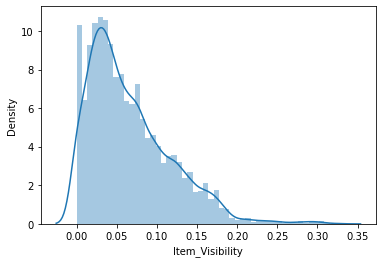

In [19]:
sns.distplot(df['Item_Visibility'])

c:\python3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

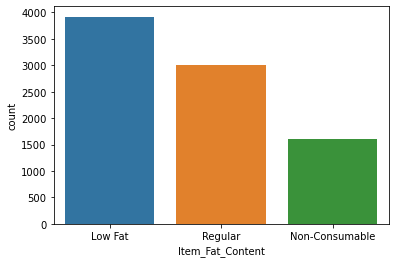

In [20]:
sns.countplot(df['Item_Fat_Content'])

c:\python3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

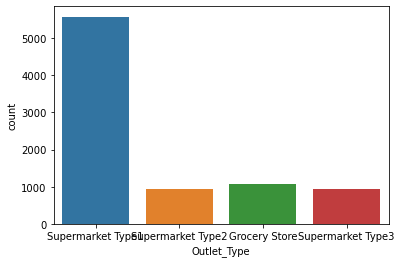

In [21]:
sns.countplot(df['Outlet_Type'])

c:\python3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

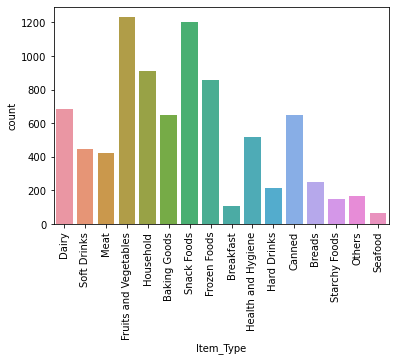

In [22]:
l=list(df['Item_Type'].unique())
chart=sns.countplot(df['Item_Type'])
chart.set_xticklabels(labels=l, rotation=90)

In [23]:
df=df.rename(columns={'New':'Eatery'})

In [24]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Eatery
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Non-Consumable,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


c:\python3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Eatery', ylabel='count'>

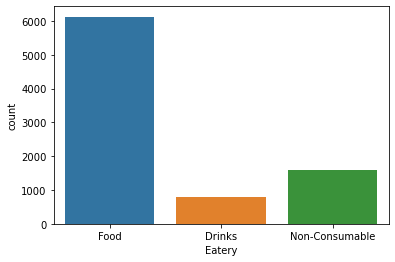

In [25]:
sns.countplot(df['Eatery'])

In [26]:
df=pd.get_dummies(df,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Eatery'])
df.head(5)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Consumable,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Eatery_Drinks,Eatery_Food,Eatery_Non-Consumable
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,1,0,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,0,0,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,1,0,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,0,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,0,1,...,0,0,1,0,1,0,0,0,0,1


In [27]:
df.drop(columns=['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Type'],inplace=True)
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Consumable,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Eatery_Drinks,Eatery_Food,Eatery_Non-Consumable
0,9.30,0.016047,249.8092,3735.1380,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,443.4228,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016760,141.6180,2097.2700,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
3,19.20,0.000000,182.0950,732.3800,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0
4,8.93,0.000000,53.8614,994.7052,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1


In [28]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)
print(f"Rows in train:{len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train:6818
Rows in test set:1705



In [29]:
df=train_set.drop('Item_Outlet_Sales',axis=1)
df_label=train_set['Item_Outlet_Sales'].copy()

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipe=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('stdsclr',StandardScaler())
])

In [31]:
df_pipe=my_pipe.fit_transform(df)

In [32]:
df_pipe.shape

(6818, 19)

In [33]:
#from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import GradientBoostingRegressor
#model=LinearRegression()
model=DecisionTreeRegressor()
#model=RandomForestRegressor()
#model=GradientBoostingRegressor()
model.fit(df_pipe,df_label)

DecisionTreeRegressor()

In [34]:
model.predict(df_pipe)

array([2386.2272, 3103.9596, 1125.202 , ..., 6145.334 , 1649.8524,
        965.41  ])

In [35]:
list(df_label.head(3))

[2386.2272, 3103.9596, 1125.202]

In [36]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model,df_pipe,df_label,scoring='neg_mean_squared_error',cv=10)
rmse=np.sqrt(-score)
rmse

array([1564.8856736 , 1528.7172701 , 1518.05012079, 1560.46492319,
       1526.58614817, 1623.93888703, 1531.40647478, 1545.55325442,
       1499.01843586, 1647.3195025 ])

In [37]:
df1=test_set.drop('Item_Outlet_Sales',axis=1)
df1_label=test_set['Item_Outlet_Sales'].copy()

In [38]:
df_pipe1=my_pipe.fit_transform(df1)

In [39]:
model.predict(df_pipe1)

array([1510.0344,  511.3344,  633.8416, ...,  633.8416,  377.5086,
        801.6232])

In [40]:
list(df1_label.head(3))

[1743.0644, 356.8688, 377.5086]

In [41]:
from joblib import dump, load
dump(model,'Project.joblib')

['Project.joblib']

In [42]:
model= load('Project.joblib')
features=np.array([[17.50, 0.016760, 141.6180, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]])
model.predict(features)

array([3681.874])